In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
import descartes
import mapclassify
import rasterio
%matplotlib inline

In [2]:
#Importing ShapeFiles
country = gpd.GeoDataFrame.from_file("Shapefiles/gadm36_PHL_shp/gadm36_PHL_0.shp")
provinces = gpd.GeoDataFrame.from_file("Shapefiles/gadm36_PHL_shp/gadm36_PHL_1.shp")
cities = gpd.GeoDataFrame.from_file("Shapefiles/gadm36_PHL_shp/gadm36_PHL_2.shp")
barangay = gpd.GeoDataFrame.from_file("Shapefiles/gadm36_PHL_shp/gadm36_PHL_3.shp")

In [3]:
cities[cities.NAME_1 == "Metropolitan Manila"]

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
960,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,None,Lungsod|Siyudad,City,137501,PH.MM.KL,"MULTIPOLYGON (((121.02068 14.71426, 121.02071 ..."
961,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.2_1,Las Piñas,"Las Piñas, City of",None,Lungsod|Siyudad,City,137601,PH.MM.LP,"MULTIPOLYGON (((120.97972 14.49306, 120.98000 ..."
962,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,"Makati, City of",None,Lungsod|Siyudad,City,137602,PH.MM.MK,"POLYGON ((121.06578 14.53872, 121.06594 14.538..."
963,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.4_1,Malabon,None,None,Lungsod|Siyudad,City,137502,PH.MM.ML,"POLYGON ((120.95800 14.65938, 120.95796 14.658..."
964,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,Lungsod|Siyudad,City,137401,PH.MM.MD,"POLYGON ((121.05405 14.57747, 121.05408 14.577..."
965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.6_1,Manila,"City of Manila|Manila, City of",None,Lungsod|Siyudad,City,133900,PH.MM.MN,"POLYGON ((120.99142 14.56218, 120.98849 14.561..."
966,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.7_1,Marikina,"Marikina, City of",None,Lungsod|Siyudad,City,137402,PH.MM.MR,"POLYGON ((121.07346 14.61962, 121.07432 14.620..."
967,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.8_1,Muntinlupa,"Muntinlupa, City of",None,Lungsod|Siyudad,City,137603,PH.MM.MU,"POLYGON ((121.02339 14.35760, 121.02313 14.357..."
968,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.9_1,Navotas,None,None,Lungsod|Siyudad,City,137503,PH.MM.NV,"POLYGON ((120.96163 14.63365, 120.96139 14.633..."
969,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.10_1,Parañaque,"Parañaque, City of",None,Lungsod|Siyudad,City,137604,PH.MM.PR,"MULTIPOLYGON (((121.00084 14.50921, 121.00104 ..."


At this point, you can view the shapefiles and examine the border that is appropriate to your intentions. You can do this by plotting the shapefiles

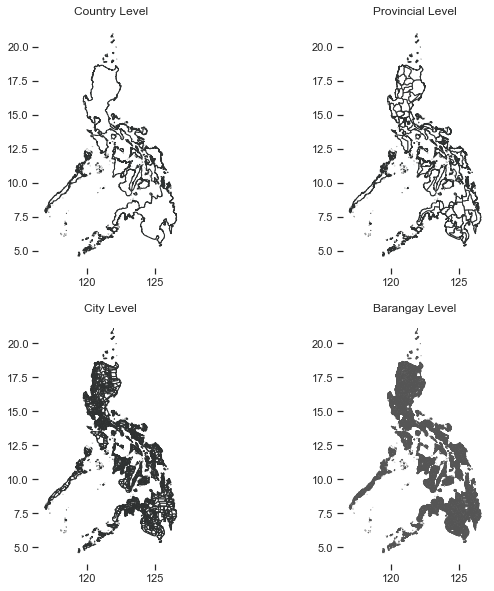

In [4]:
#Plotting Shapefiles using GeoPandas
fig, axes = plt.subplots(2,2, figsize=(10,10));

country.plot(ax=axes[0][0], color='white', edgecolor = '#2e3131');
provinces.plot(ax=axes[0][1], color='white', edgecolor = '#2e3131');
cities.plot(ax=axes[1][0], color='white', edgecolor = '#2e3131');
barangay.plot(ax=axes[1][1], color='white', edgecolor = '#555555');

adm_lvl = ["Country Level", "Provincial Level", "City Level", "Barangay Level"]
i = 0
for ax in axes:
    for axx in ax:        
        axx.set_title(adm_lvl[i])
        i = i+1
        axx.spines['top'].set_visible(False)
        axx.spines['right'].set_visible(False)
        axx.spines['bottom'].set_visible(False)
        axx.spines['left'].set_visible(False)

In [5]:
#Data Cleaning
df = pd.read_excel("data/2015 Population Density.xlsx",
                  header=1,
                  skipfooter=25,
                   usecols='A,B,D,E',
                  names=["City", 'Population', "landArea_sqkms", "Density_sqkms"])

In [6]:
df=df.replace('\*','',regex=True)
df.City=df.City.str.replace('[0-9]','',regex=True)
df.City=df.City.str.replace('\(.*?\)','',regex=True)
df['City'] = df['City'].str.replace(r'City of ', '')
df['City'] = df['City'].str.replace(r'Municipality of ', '')
df['City'] = df['City'].str.replace(r'Niño', 'Nino')
df['City'] = df['City'].str.replace(r'\(Capital of Basilan\)', 'Capital')
df['City'] = df['City'].str.strip()
df.City = df.City.replace('',np.nan)
df = df.dropna(how="any")

In [7]:
df_name = ['Makati','Cabadbaran', 'Bayugan', 'Taguig City', 'Caloocan City', 'Pasig','Ligao' ] 
cities_name = ['Makati City','Cabadbaran City', 'Bayugan City','Taguig',"Kalookan City","Pasig City", "Ligao City"]
for i in range(len(df_name)):
    df.City = df.City.str.replace(df_name[i],cities_name[i])

In [8]:
sorted_df = df.sort_values("Density_sqkms", ascending=False,ignore_index=True )[:50]

500

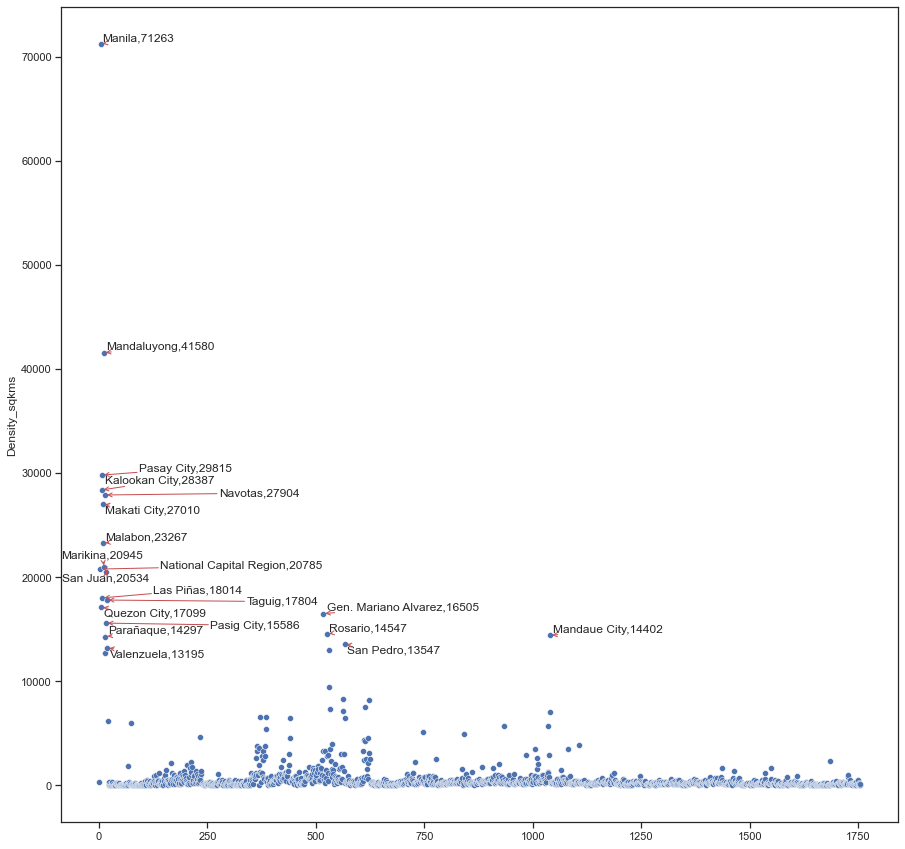

In [9]:
#Exploratory Data Analysis
fig, ax = plt.subplots(figsize=(15,15));
scatter = sns.scatterplot(x=df.index, y=df.Density_sqkms)
sorted_df = df.sort_values("Density_sqkms", ascending=False)[:20]

from adjustText import adjust_text
texts = [ax.text(p[0], p[1],"{},{}".format(sorted_df.City.loc[p[0]], round(p[1])),
          size='large') for p in zip(sorted_df.index, sorted_df.Density_sqkms)];
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=1), precision=0.01)

In [10]:
x= pd.DataFrame(df.City.value_counts()).reset_index().sort_values(['City', 'index'], ascending=[False, True])
x = x[x.City != 1]['index'].to_list()
unique_df = df[~df.City.isin(x)]
len(unique_df)

1357

In [11]:
print(len(x))
pd.Series(x).to_csv("RepeatedCities.csv") 

129


In [12]:
merged_df = unique_df.merge(cities, left_on="City", right_on="NAME_2", how="outer")
merged_df.shape
print("Cities that do not have statistical info: ",len(merged_df[merged_df.City.isna()]))
print("Population data that does not have GADM (shapefile) data: ", len(merged_df[merged_df.NAME_2.isna()]))

Cities that do not have statistical info:  457
Population data that does not have GADM (shapefile) data:  169


In [13]:
i = 98
amended_cities = cities.copy()
amended_cities.NAME_2 = amended_cities.NAME_2.str.replace("City","").str.strip()
amended_cities.NAME_2 = amended_cities.NAME_2.str.replace(r'Niño', 'Nino').str.strip()

display(amended_cities[amended_cities.NAME_2==x[i]][["NAME_1", "NAME_2"]].reset_index(drop=True));
print("Length: ", len(amended_cities[amended_cities.NAME_2==x[i]][["NAME_1", "NAME_2"]].reset_index(drop=True)))
print('---------------------------------------------')
display(df[df.City==x[i]])
print("Length: ", len(df[df.City==x[i]]))

,NAME_1,NAME_2


Length:  0
---------------------------------------------


,City,Population,landArea_sqkms,Density_sqkms
235,San Carlos City,188571.0,169.03,1115.606697
1077,San Carlos City,132536.0,451.5,293.545958


Length:  2


In [14]:
#Manual Indexing
psa_stat_index=[
    [0,4,7,1,5,6,2,3,8], #San Isidro, 0
    [8,1,6,7,2,0,4,5,3], #San Jose, 1
    [1,0,3,2,np.nan,4,5,6], #Rizal, 2
    [0,1,5,3,2,4,6], #Pilar, #3
    [1,4,3,np.nan,6,5, 0], #Quezon, 4
    [3,5,6,1,4,2,0], #San Fernando, #5
    [4,0,2,3,1,5,6], #San Juan, #6    
    [1,2,3,0,4,6,5], #San Miguel,7
    [2,5,3,0,4,6,1], #Santa Maria, #8
    [0,1,3,4,2,5], #Burgos, 9
    [1,2,3,4,0,5], # Carmen, 10
    [1,5,2,3,4,0], #Santa Cruz, 11
    [3,5,2,4,0,1], #Santo Tomas, 12
    [4,3,2,1,0], #Buenavista, 13
    [3,4,1,2,0], #Magsaysay, 14
    [3,1,2,4,0], #Rosario, 15
    [2,1,3,0,4], #San Francisco, 16
    [3,2,0,1], #Concepcion, 17
    [0,3,2,1], #La Paz, 18
    [3,0,1,2], #Mabini, 19
    [1,3,2,0], #San Antonio, 20
    [1,3,2,0], #San Luis, 21
    [1,3,0,2], #San Vicente, 22
    [2,3,0,1], #Santa Fe, 23
    [0,1,2,3], #Talisay, 24
    [3,0,2,1], #Victoria, 25
    [1,0,2], #Alicia, 26
    [0,np.nan, 1], #Aurora, 27
    [0,1,2], #Bato, 28
    [0,1,2], #Claveria, 29
    [0,2,1], #Dolores, 30
    [1,2,0], #Esperanza 31
    [np.nan, 1,0], #Isabela 32
    [0,2,1], #Luna 33
    [1,2,0], #Magallanes, 34
    [0,1,2], #Pamplona 35
    [0,2,1], #Plaridel, 36
    [0,1, np.nan], #Quirino, 37
    [1,2,0], #Roxas, 38
    [0,1,2], #San Agustin, 39
    [1,2,0], #San Andres 40
    [1,0,2], #San Manuel, 41
    [1,2,0], #San Nicolas, 42
    [1,2,0], #Santiago, 43
    [1,2,0], #Santo Domingo, 44
    [0,1,2], #Santo Nino, 45
    [0,2,1], #Valencia, 46
    [1,0], #Alaminos, 47
    [1,0], #Alcala, 48
    [1,0], #Alcantara, 49
    [0,1], #Alegria, 50
    [1,0], #Anda, 51
    [1,0], #Balete, 52
    [0,1], #Banga, 53
    [1,0], #Baras, 54
    [1,0], #Batuan, 55
    [np.nan, 0], #Biliran 56
    [0,1], #Bontoc, 57
    [np.nan, 0], #Bulacan, 58
    [1,0], #Cabatuan, 59
    [0,1],#Calamba, 60
    [1,0], #Calatrava 61
    [1,0], #Candelaria 62
    [0,1], #Casiguran 63
    [1,0], #Catarman, 64
    [0,1],# Cauayan, 65
    [0,1], #Clarin, 66
    [0,1], #Compostella, 67
    [0,1], #Cortes, 68
    [0,1], #General Luna 69
    [0,1], #Hagonoy, 70
    [0,1], #Infanta, 71
    [np.nan,1], #sabela, 72
    [0,np.nan], #Kalayaan, 73
    [0,1], #Kapatagan, 74
    [0,1], #La Libertad, 75 
    [0,1], #lemery 76
    [0,1], #Libertad 77
    [0,1], #Liloan, 78
    [0,1], #Looc 79
    [0,1], #Loreto, 80
    [0,1], #Maasin #81
    [1,0], #Malinao 82
    [1,0], #Maltibog 83
    [np.nan, 0], #Masbate, 84
    [0,1], #Mercedes, 85
    [0,1],#Morong, 86
    [1,2], #Naga, 87
    [1,0], # Naguilan 88
    [0,1], #Padre Burgos 89
    [1,0], #Pandan 90
    [0,1], #Parang, 91
    [0,1], #Pitogo, 92
    [0,1], #Placer, 93
    [0,1], #Pontevedra 94
    [0,1], #President Roxas 95
    [np.nan, 0], #Romblon 96
    [1,0], #Salcedo 97
    [np.nan,np.nan], #San Carlos 98
    [0,1], #San Enrique 99
    [1,0], #San Idelfonso 100
    [1,0], #San Jacinto, 101
    [0,1], #San Mateo, 102
    [1,0], #San Narciso, 103
    [0,2], #San Pablo, 104 
    [0,1], #San Pascual, 105
    [0,1], #San Quintin, 106
    [0,1], #San Rafael. 107
    [0,1], #San Remigio, 108
    [0,1], #Santa Ana,109
    [1,0], #Santa Barbara, 110
    [0,1], #Santa Catalina, 111
    [0,1], #Santa Rita, 112
    [1,0], #Santa Rosa, 113
    [1,0], #Santa Teresita, 114
    [0, np.nan], #Sarangani, 115
    [np.nan, 1], #Siquijor, 116
    [0,1], #Sison 117
    [0,1], #Socorro 118
    [0,1], #Sogod 119
    [np.nan, 0], #Sorsogon 120
    [np.nan, 0], #Sultan Kudarat 121   
    [0,1], #Tagoloan, 122
    [0,1], #Tanauan, 123
    [np.nan, 0], #Tarlac 124
    [1,0], #Taytay 125
    [0,1], #Tubod 126
    [1,0], #Tuburan 127
    [0,1], #Tudela, 128
]

from tqdm import tqdm

dfs = []
for i in tqdm(range(len(psa_stat_index))):
    dft = df[df.City==x[i]].set_index([psa_stat_index[i]]).merge((cities[cities.NAME_2==x[i]]).reset_index(drop=True), right_index=True, left_index=True)
    dfs.append(dft)


100%|██████████| 129/129 [00:00<00:00, 182.16it/s]


In [15]:
for table in dfs:
    merged_df = pd.concat([merged_df, table])

In [16]:
merged_df = merged_df.drop_duplicates(subset=["CC_2"], keep="last")

print("Cities that do not have statistical info: ",len(merged_df[merged_df.City.isna()]))

Cities that do not have statistical info:  107


In [17]:
print("Number of unique population entries: ", df.Population.nunique())
print("Number of unique density entries: ", df.Density_sqkms.nunique())
print("Number of entries in merged dataframe: ", len(merged_df))
print("Number of entries in stastical dataframe: ", len(df))

Number of unique population entries:  1720
Number of unique density entries:  1732
Number of entries in merged dataframe:  1629
Number of entries in stastical dataframe:  1732


In [18]:
#Cleaning cities without statistical info
geo_df_cols = cities.columns.to_list()
unmatched_df_columns = merged_df.columns.to_list()
unmatched_df = pd.DataFrame(columns=unmatched_df_columns)

In [19]:
def clean_stat_and_geo_dataframes(merged_df):
    unmatched_df = pd.DataFrame(columns=unmatched_df_columns)
    
    densities = merged_df["Density_sqkms"].reset_index(drop=True).to_list()
    unmatched_index = [] 

    for i in range(len(df)):
        if df.iat[i,3] not in densities:
            unmatched_index.append(i)

    unmatched_stat = df.iloc[unmatched_index].reset_index(drop=True)
    unmatched_geo_df = merged_df[merged_df.City.isna()].reset_index(drop=True)[geo_df_cols]
    
    city_count = pd.DataFrame(unmatched_stat.City.value_counts())
    cities_list = city_count[city_count.City == 1].reset_index()["index"].str.lower().to_list()
    geo_df_count = pd.DataFrame(unmatched_geo_df.NAME_2.value_counts())
    geo_df_cities_list = geo_df_count[geo_df_count.NAME_2 == 1].reset_index()["index"].str.lower().to_list()
    return unmatched_geo_df, unmatched_stat, geo_df_cities_list, cities_list, merged_df

def merge_and_clean(merged_df, unmatched_df):
    print("Initializing merge and clean algorithm")
    print("<>-------<>-------<>-------<>-------<>-------<>")
    print("")
    print("Unmatched dataframe has {} entries".format(len(unmatched_df)))
    merged_df = pd.concat([merged_df, unmatched_df])
    merged_df = merged_df.drop_duplicates(subset=["CC_2"], keep="last")
    print("<>-------<>-------<>-------<>-------<>-------<>")
    print("Cities that do not have statistical info: ",len(merged_df[merged_df.City.isna()]))
    print("")
    return clean_stat_and_geo_dataframes(merged_df)
    
# Ignoring LowerCasing    
unmatched_geo_df, unmatched_stat, geo_df_cities_list, cities_list, merged_df = clean_stat_and_geo_dataframes(merged_df)

for i in range(len(unmatched_geo_df)):
    if unmatched_geo_df.iloc[i].NAME_2.lower() in cities_list:
        a = unmatched_geo_df.iloc[i].to_list()
        name = unmatched_geo_df.iloc[i].NAME_2.lower()
        b = unmatched_stat[unmatched_stat.City.str.lower().str.contains(name)].iloc[0].to_list()
        c = b+a
        unmatched_df.loc[len(unmatched_df)] = c
print("Unmatched dataframe has {} entries".format(len(unmatched_df)))
print("Cities that do not have statistical info: ",len(merged_df[merged_df.City.isna()]))

unmatched_geo_df, unmatched_stat, geo_df_cities_list, cities_list, merged_df = merge_and_clean(merged_df, unmatched_df)

for i in range(len(unmatched_geo_df)):
    if unmatched_geo_df.iloc[i].NAME_2.lower() + " city" in cities_list:
        a = unmatched_geo_df.iloc[i].to_list()
        name = unmatched_geo_df.iloc[i].NAME_2.lower()
        b = unmatched_stat[unmatched_stat.City.str.lower().str.contains(name)].iloc[0].to_list()
        c = b+a
        unmatched_df.loc[len(unmatched_df)] = c
print("Unmatched dataframe has {} entries".format(len(unmatched_df)))
print("Cities that do not have statistical info: ",len(merged_df[merged_df.City.isna()]))

unmatched_geo_df, unmatched_stat, geo_df_cities_list, cities_list, merged_df = merge_and_clean(merged_df, unmatched_df)

for i in range(len(unmatched_stat)):
    if unmatched_stat.iloc[i].City.lower() + " city" in geo_df_cities_list:
        a = unmatched_stat.iloc[i].to_list()
        name = unmatched_stat.iloc[i].City.lower() + " city"
        b = unmatched_geo_df[unmatched_geo_df.NAME_2.str.lower().str.contains(name)].iloc[0].to_list()
        c = a+b
        unmatched_df.loc[len(unmatched_df)] = c
unmatched_geo_df, unmatched_stat, geo_df_cities_list, cities_list, merged_df = merge_and_clean(merged_df, unmatched_df)

Unmatched dataframe has 21 entries
Cities that do not have statistical info:  107
Initializing merge and clean algorithm
<>-------<>-------<>-------<>-------<>-------<>

Unmatched dataframe has 21 entries
<>-------<>-------<>-------<>-------<>-------<>
Cities that do not have statistical info:  86

Unmatched dataframe has 26 entries
Cities that do not have statistical info:  86
Initializing merge and clean algorithm
<>-------<>-------<>-------<>-------<>-------<>

Unmatched dataframe has 26 entries
<>-------<>-------<>-------<>-------<>-------<>
Cities that do not have statistical info:  81

Initializing merge and clean algorithm
<>-------<>-------<>-------<>-------<>-------<>

Unmatched dataframe has 81 entries
<>-------<>-------<>-------<>-------<>-------<>
Cities that do not have statistical info:  31



In [20]:
unmatched_geo_df = unmatched_geo_df.sort_values(by=["NAME_2", "NAME_1"], ascending=[True, True]).reset_index(drop=True)
unmatched_geo_df

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL,Philippines,PHL.15_1,Bohol,None,PHL.15.1_1,Albuquerque,Alburquerque,None,Bayan|Munisipyo,Municipality,71201,PH.BO.AB,"POLYGON ((123.95467377 9.60758972, 123.9544372..."
1,PHL,Philippines,PHL.42_1,Lanao del Sur,None,PHL.42.1_1,Bacolod Kalawi,Bacolod-Kalawi (Bacolod Grande),None,Bayan|Munisipyo,Municipality,153601,PH.LS.BC,"(POLYGON ((124.13725281 7.85604, 124.13626862 ..."
2,PHL,Philippines,PHL.37_1,Isabela,None,PHL.37.8_1,Cauayan City,None,None,Lungsod|Siyudad,City,23108,PH.IB.CU,"POLYGON ((121.80235291 16.83415985, 121.802543..."
3,PHL,Philippines,PHL.25_1,Cebu,None,PHL.25.20_1,Cordoba,None,None,Bayan|Munisipyo,Municipality,72220,PH.CB.CO,"(POLYGON ((123.99128723 10.20582962, 123.99157..."
4,PHL,Philippines,PHL.44_1,Maguindanao,None,PHL.44.7_1,Datu Abdullah Sanki,None,None,Bayan|Munisipyo,Municipality,153828,None,"POLYGON ((124.51439667 6.72666979, 124.5108871..."
5,PHL,Philippines,PHL.36_1,Iloilo,None,PHL.36.16_1,Duenas,Dueñas,None,Bayan|Munisipyo,Municipality,63017,PH.II.DE,"POLYGON ((122.59311676 10.99773979, 122.591712..."
6,PHL,Philippines,PHL.24_1,Cavite,None,PHL.24.8_1,General Mariano Alvarez,None,None,Bayan|Munisipyo,Municipality,42123,PH.CV.GL,"POLYGON ((121.00055695 14.27995014, 120.998016..."
7,PHL,Philippines,PHL.15_1,Bohol,None,PHL.15.27_1,Jetafe,None,None,Bayan|Munisipyo,Municipality,71226,PH.BO.JT,"(POLYGON ((124.08110809 10.17778015, 124.08110..."
8,PHL,Philippines,PHL.40_1,Laguna,None,PHL.40.9_1,Kalayaan,None,None,Bayan|Munisipyo,Municipality,43409,PH.LG.KL,"POLYGON ((121.48301697 14.31626034, 121.482009..."
9,PHL,Philippines,PHL.80_1,Zamboanga del Sur,None,PHL.80.11_1,Lakewood Lake,None,None,Waterbody,Waterbody,0,None,"POLYGON ((123.15409088 7.8333602, 123.15350342..."


In [21]:
#Create index to merge with unmatched_geo_df
unmatched_stat_index = [
    np.nan, #Albaquerque
    125, #Bacolod-Kalawi,
    np.nan, #Cauayan
    np.nan, #Cordoba
    128, #Datu Abdullah Sanki
    np.nan, #Duenas
    37, #Gen. Mariano Alvarez,
    np.nan, #Jetafe
    40, #Kalayaan,
    np.nan, #Lakewood Lake
    126, #Lumbaca-Unayan,
    35, #Mataas na Kahoy,
    38, #Mendez,
    28, #Muñoz
    95, #Naga
    np.nan, #Paoay
    91, #Piñan
    14, #Pozurrubio
    np.nan, #Quezon
    57, #Sagnay
    105, #Island City of Samal
    80, #San Carlos City
    15, #San Carlos City
    52, #San Fernando La Union
    30, #San Fernando - Pampanga,
    112, #Santo Nino
    92, #Sergio
    77, #Siquijor
    50, #Sofronio Espanola
    75, #Talisay
    81, #Talisay
]

In [22]:
merged_df[merged_df.Population == 104116]

,City,Population,landArea_sqkms,Density_sqkms,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,Quezon,104116.0,626.86,166.091312,PHL,Philippines,PHL.16_1,Bukidnon,None,PHL.16.18_1,Quezon,None,None,Bayan|Munisipyo,Municipality,101317,PH.BK.QE,"POLYGON ((125.18409729 7.60171986, 125.1534500..."


In [23]:
unmatched_df = unmatched_stat.merge(unmatched_geo_df.set_index([unmatched_stat_index]),left_index=True, right_index=True)

In [24]:
merged_df = pd.concat([merged_df, unmatched_df])
merged_df = merged_df.drop_duplicates(subset=["CC_2"], keep="last")
merged_df = merged_df.drop_duplicates(subset=["Density_sqkms"],keep="last")

#Making merged_df a GeoDataFrame
merged_df = gpd.GeoDataFrame(merged_df, crs="EPSG:4326")
merged_df = merged_df.reset_index(drop=True) 

len(merged_df)

1621

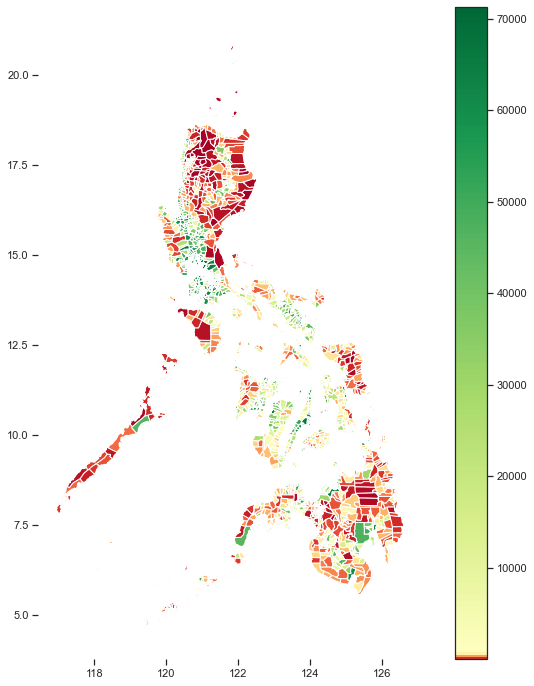

In [25]:
#Visualisations
k = 1600
cmap = 'RdYlGn'
figsize=(12,12)
scheme= 'Quantiles'

ax = merged_df.plot(column='Density_sqkms', cmap=cmap, figsize=figsize,
                          scheme=scheme, k=k, legend=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

vmin, vmax, vcenter = merged_df.Density_sqkms.min(), merged_df.Density_sqkms.max(), merged_df.Density_sqkms.mean()
divnorm = colors.TwoSlopeNorm (vmin=vmin, vcenter=vcenter, vmax=vmax)

cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
fig.colorbar(cbar, ax=ax)
# plt.show()